A collection of python tools for astronomical image analysis. <br>
By Geferson Lucatelli

Objectives:
1. Basic image manipulation and plotting.
2. Characterize the structure of radio emission from radio maps.

Specific Objectives:
1. Determine integrated flux densities
2. Determine the sizes of radio emission: calculate common photometric radii.
3. Determine the area of emission.
4. Compute global geometrical properties: centre of light, axis ratio and orientation. 
5. Morphometry: compute concentration, asymmetry, Gini, $M_{20}$ and entropy (work in progress - implementation). 

Basically, this notebook contains:

    1. Plotting capabilities
    2. Signal processing / Image analysis (non-parametric)
    3. Others

Multiple libraries, functions, etc, are placed in the library file `libs/libs.py`. The module `morphen.py` helps to deal with different kinds of tasks. You can run it on a notebook or as a `CLI`. 

Index:

1. [Introduction/Imports](#imports) <br>
2. [Data Manipulation](#data_manipulation) <br>
    2.1 [Preparing Images](#preparing_images) <br>
    2.2 [Masking](#masking) <br>
3. [Image Analysis](#image_analysis) <br>
    3.1 [Functions](#) <br>
    3.2 [$e$-MERLIN Example](#emerlin_example) <br>
    3.3 [JVLA Example](#jvla_example) <br>
    3.4 [Poor SNR Example](#poor_snr_example) <br>

<a id='imports'></a>

```
 _           ___                            _       
/ |         |_ _|_ __ ___  _ __   ___  _ __| |_ ___ 
| |  _____   | || '_ ` _ \| '_ \ / _ \| '__| __/ __|
| | |_____|  | || | | | | | |_) | (_) | |  | |_\__ \
|_|         |___|_| |_| |_| .__/ \___/|_|   \__|___/
                          |_|                      
```

Currently, all python functions are located in the file `libs/libs.py`. 

In [1]:
import sys
import morphen as mp
# sys.path.append('libs/')
import libs as mlibs
import numpy as np
# from libs import *


                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

<a id='data_manipulation'></a>

```
 ____            ____        _
|___ \          |  _ \  __ _| |_ __ _
  __) |  _____  | | | |/ _` | __/ _` |
 / __/  |_____| | |_| | (_| | || (_| |
|_____|         |____/ \__,_|\__\__,_|

 __  __             _             _       _   _             
|  \/  | __ _ _ __ (_)_ __  _   _| | __ _| |_(_) ___  _ __  
| |\/| |/ _` | '_ \| | '_ \| | | | |/ _` | __| |/ _ \| '_ \ 
| |  | | (_| | | | | | |_) | |_| | | (_| | |_| | (_) | | | |
|_|  |_|\__,_|_| |_|_| .__/ \__,_|_|\__,_|\__|_|\___/|_| |_|
                     |_|                                    

````

## 2.1 Reading Imaging Data

A set of example images can be found in this link: 

https://filedn.com/lNSVniBJI40jEXAJtSnTjPQ/astrodata/LIRGI_sample/data_examples/data_examples.tar.xz
<br>
With this, you can experiment with the usage of these tools. 


The default option of the following functions is to receive the image file as actually the filename, not the data it contains. 

Why? Because radio astronomy requires constantly reading/keeping information from the image header. 
<!-- In some functions, you can provide as input a 2D numpy array using the `data_2D` argument, but in that case you MUST provide the file name from which the data comes from.  -->

In [2]:
root_path_vla = 'data_examples/vla_only/VV705_C/' #only JVLA images.
root_path_eM = 'data_examples/emerlin_only/VV705_C/' #only e-MERLIN images.
root_path_comb = 'data_examples/combined/VV705_C/' #combined (e-MERLIN + JVLA) images.
prefix_images = 'MFS_images/north/*MFS-image.cutout_north.fits' #The north component of VV705

In [3]:
imagelist_vla = mlibs.glob.glob(root_path_vla+prefix_images)
imagelist_comb = mlibs.glob.glob(root_path_comb+prefix_images)
imagelist_eM = mlibs.glob.glob(root_path_eM+prefix_images)

In [4]:
#this function is helpfull to sort the image list according to the restoring 
# beam size (from smaller beams to larger beams). 
imagelist_vla,residuallist_vla = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_vla,return_df = False)
imagelist_eM,residuallist_eM = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_eM,return_df = False)
imagelist_comb,residuallist_comb = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_comb,return_df = False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 28.69it/s]


0 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
1 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
2 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits
3 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 53.94it/s]


0 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_north.fits
1 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
2 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
3 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits
4 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 57.20it/s]

0 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-1.0-MFS-image.cutout_north.fits
1 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.6-MFS-image.cutout_north.fits
2 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.4-MFS-image.cutout_north.fits
3 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.2-MFS-image.cutout_north.fits
4 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
5 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
6 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits


In [5]:
imagelist_comb

array(['data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-1.0-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.6-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.4-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.2-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits',


In [6]:
residuallist_vla

array(['data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-residual.cutout_north.fits',
       'data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-residual.cutout_north.fits',
       'data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-residual.cutout_north.fits',
       'data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-residual.cutout_north.fits'],
      dtype=object)

In [7]:
imagelist_eM,residuallist_eM = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_eM,return_df = False)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.59it/s]

0 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_north.fits
1 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
2 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
3 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits
4 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits


In [8]:
residuallist_eM

array(['data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-residual.cutout_north.fits'],
      dtype=object)

For general use, you can use the function `ctn`, means, casa to numpy. It just reads fits files, even those cases that astropy wont work at first glance (e.g. some CASA converted images). 

In [9]:
mlibs.ctn??

Signature: mlibs.ctn(image)
Source:   
def ctn(image):
    '''
        Name origin:
        ctn > casa to numpy
        Function that read fits files, using casa IA.open or astropy.io.fits.
        Note: For some reason, IA.open returns a rotated mirroed array, so we need
        to undo it by a rotation.
        '''
    try:
        ia = IA()
        ia.open(image)
        try:
            numpy_array = ia.getchunk()[:, :, 0, 0]
        except:
            numpy_array = ia.getchunk()[:, :]
        ia.close()
        # casa gives a mirroed and 90-degree rotated image :(
        data_image = np.rot90(numpy_array)[::-1, ::]
        return (data_image)
    except:
        try:
            data_image = pf.getdata(image)
            return (data_image)
        except:
            print('Input image is not a fits file.')
            return(ValueError)
File:      /mirror/scratch/lucatelli/pcloud/PhD/GitHub/morphen/libs/libs.py
Type:      function

## 2.2 Quick look to the data: reading and plotting.

Quick check of the image(s).

`eimshow` is a wraper for plt.imshow, means enhanced-imshow, designed to be customized and fast. Default arguments works well.

Using the module `morphen.py`, we can also import the data with:

In [10]:
idx = -1
input_data=mp.read_data(filename=imagelist_eM[idx],
                        residualname=residuallist_eM[idx])

Image File: clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits
Residual File: clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-residual.cutout_north.fits


Numpy arrays containing the data can be acessed as:

In [11]:
image_data = input_data.image_data_2D
residual_data = input_data.residual_data_2D

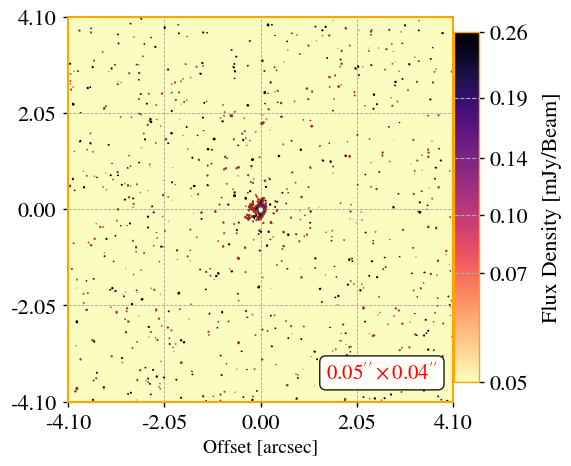

In [12]:
ax=mlibs.eimshow(input_data.filename,add_beam=True,
        vmin_factor=3.0,vmax_factor=0.1, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which negative std level?
        CM='magma_r',
       )

/home/sagauga/miniconda3/envs/morphen38/lib/python3.8/site-packages/numpy/core/function_base.py:431: RuntimeWarning: invalid value encountered in log10
  log_start = _nx.log10(start)


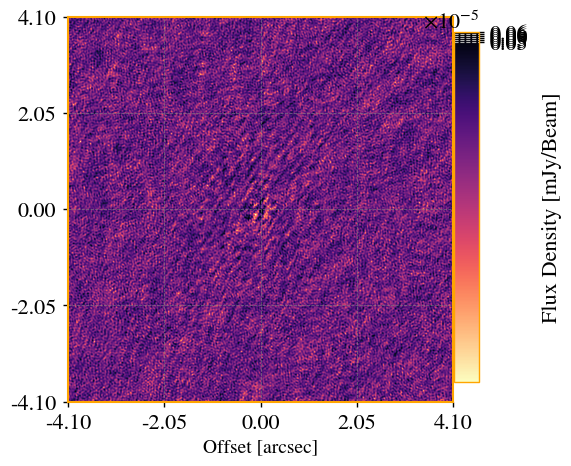

In [13]:
ax=mlibs.eimshow(input_data.residualname,
        vmin_factor=-3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        CM='magma_r',add_contours=False # remove contours
       )

#### Want to zoom-in in the image? 

Use the argument `crop=True` and provide a `box_size`, e.g. `box_size = 50`.

  >> Center -->  [512 510   0   0]


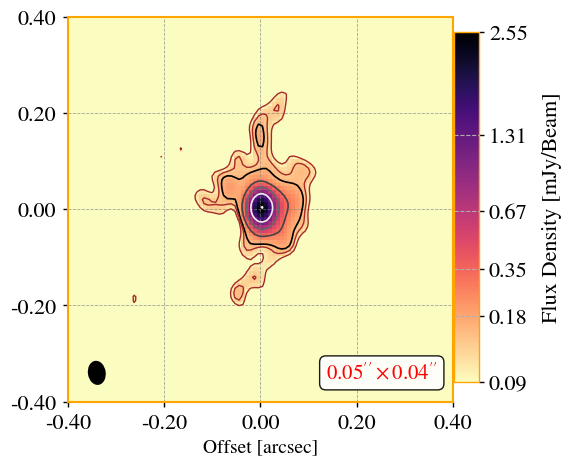

In [14]:
ax=mlibs.eimshow(input_data.filename,
        vmin_factor=3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=50,add_beam=True,
       )

#### Use proper RMS value
If the zoom-in is not computing the `rms` value properly (e.g. because the zoom-in box is too small), you can provide it 
use the residual `rms` or a custom of your choice. 

  >> Center -->  [512 510   0   0]


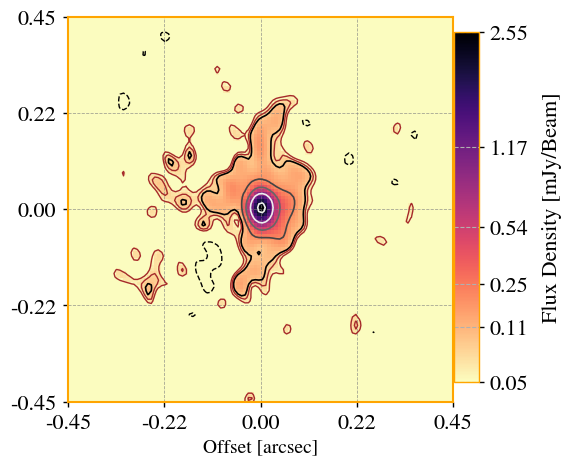

In [15]:
rms = input_data.rms_res
ax=mlibs.eimshow(input_data.filename,rms=rms,
        vmax_factor=0.99, vmin_factor=3.0, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=56
       )

<a id='image_analysis'></a>

```
 _____           ___                            
|___ /          |_ _|_ __ ___   __ _  __ _  ___ 
  |_ \   _____   | || '_ ` _ \ / _` |/ _` |/ _ \
 ___) | |_____|  | || | | | | | (_| | (_| |  __/
|____/          |___|_| |_| |_|\__,_|\__, |\___|
                                     |___/      
    _                _           _     
   / \   _ __   __ _| |_   _ ___(_)___ 
  / _ \ | '_ \ / _` | | | | / __| / __|
 / ___ \| | | | (_| | | |_| \__ \ \__ \
/_/   \_\_| |_|\__,_|_|\__, |___/_|___/
                       |___/
```

# 3 Basic Image Analysis

I am going to demonstrate the usage of the code for two extreme cases.
The first case, contains enough SNR, and the other case is an extreme situation, with poor SNR 
(e.g. eMERLIN image of VV 250 NW). 


Be aware that these functions are in current development. Future improvements are expected!

If you  may want to request some kind of particular analysis, suggest modifications, point out  
issues, etc, fell free to e-mail me.

Here, I will just list some operations that currently are supported.

## 3.1 - Some functions
Standard available functions needed to extract properties from images are listed below. 

### 3.1.1 Masking
Masking is critical to obtain accurate information of the emission structure and its total integrated flux density. 
In here, we use a conservative threshold based on the median absolute deviation (`mad`), where we use `6 sigma_mad` and from that apply a mask dilation to recover the faint emission. You can set another threshold as well (check examples below).

Relevant arguments:
- `sigma` : median absolute deviation threshold limit, discard intensities lower than that. Default is `6`
- `dilation_size` : The size of the dilation of the mask. Default is `None`, which uses the size of the restoring beam from the interferometric image.
- `iterations` : Number of iterations to perform the mask dilation. Default is `2`. Using `dilation_size=None`  and `iterations=2` is a good choice.
- `rms` : the reference rms background level, in which `threshold = rms * sigma`. If `rms=None`, it will be estimated from the image. Note, however, that if there is not enough sampling data points for the background, `rms` will be overestimated. In that case, you need to provide a proper `rms` value.

In [55]:
mlibs.mask_dilation

<function libs.mask_dilation(image, cell_size=None, sigma=6, rms=None, dilation_size=None, iterations=2, dilation_type='disk', PLOT=False, show_figure=True)>

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


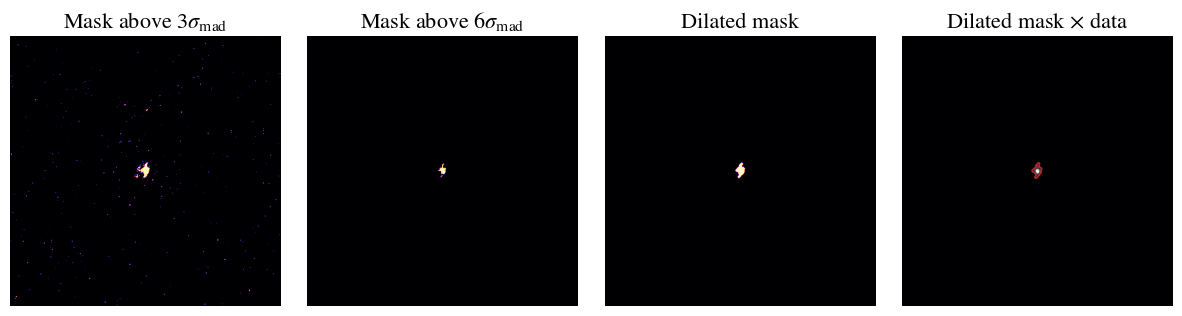

In [16]:
mask = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=None)

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


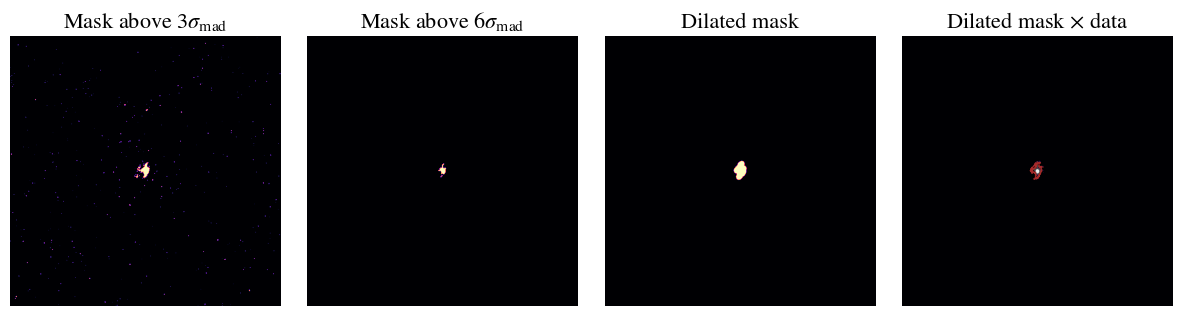

In [17]:
_ = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=5)

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


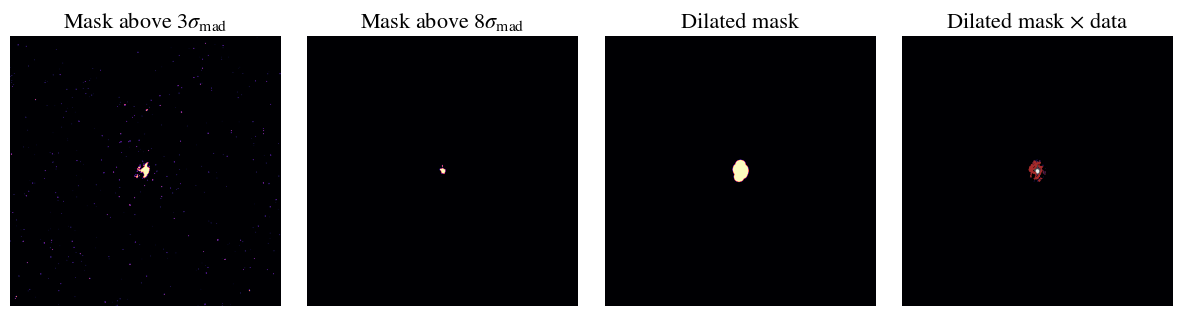

In [18]:
_ = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=8,dilation_size=10)

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


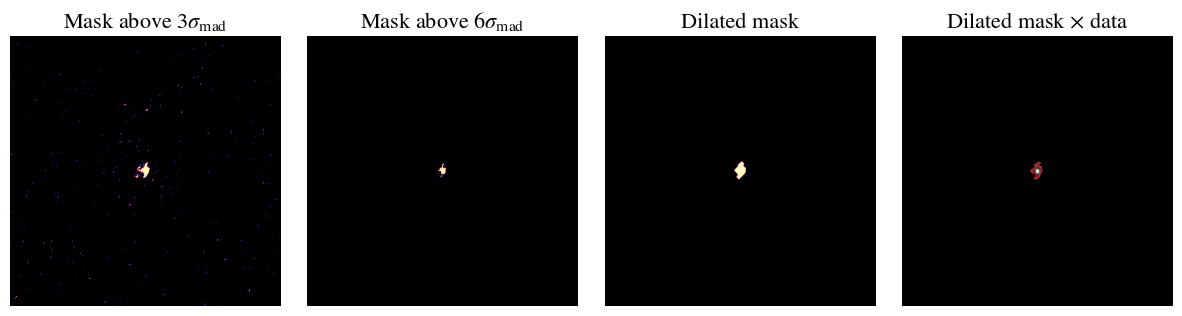

In [19]:
mask = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=None,iterations=4)

### 3.1.2 - `level_statistics()`
Function to compute basic image statistics, such as total flux density and uncertain flux density. 

It splits the range of image intensity values in four distinct regions:

1. Inner region: intensities/fluxes within `[peak intensity, 0.1 * peak intensity]`
2. Mid region: intensities/fluxes within `[0.1 * peak intensity, 10 * rms]`
3. Low region: intensities/fluxes within `[10 * rms, 6 * rms]`
4. Uncertain region: intensities/fluxes within `[6 * rms, 3 * rms]`
    
The flux uncertainty is computed as being the flux from $6 \times \sigma_{\rm mad}$ to $3 \times \sigma_{\rm mad}$.

Note that you do not have to provide the dilated mask computed previously. It is calculated inside the function, using the `6 sigma` threshold. You can change the `sigma` argument accordingly, or provide the mask as well, with the `mask` argument. 



In [20]:
# mlibs.level_statistics??

In [21]:
mlibs.level_statistics(img=input_data.filename,
                       mask=None)

{'#imagename': 'clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits',
 'total_flux': 0.0056360715531916525,
 'inner_flux': 0.00372040954388366,
 'low_flux': 0.001390297329629326,
 'mid_flux': 0.0005253646796786665,
 'uncertain_flux': 0.0,
 'inner_flux_f': 0.6601068685469098,
 'low_flux_f': 0.24667843843146636,
 'mid_flux_f': 0.09321469302162383,
 'uncertain_flux_f': 0.0,
 'number_of_beams': 30.15484485026964,
 'n_beams_inner': 4.489856174889242,
 'n_beams_mid': 2.4876230158170123,
 'n_beams_low': 10.405545053966284,
 'n_beams_uncertain': 0.0}

### 3.1.3 - Image Shape Analysis
Now, we can calculate global properties of the radio emission, for example:
 - Total integrated flux density
 - Peak brightness
 - Flux density uncertainty
 - Half-light radius $R_{50}$
 - Orientation $PA$
 - Axis ratio $q$

Argument options: 
 - `last_level=1` means that almost all emission inside the dilated mask should be used in the computation. If using, for example `last_level=3`, a new threshold is calculated inside the masked region, above `3 sigma mad`. If you are using the mask dilation with a conservative threshold, it is 'safe' to use `last_level=1`. 

128 512 384
non real ellipse
non real ellipse


/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:262: RuntimeWarning: invalid value encountered in divide
  qmedian = np.nanmedian(BB / AA)
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:264: RuntimeWarning: invalid value encountered in divide
  qmi = np.nanmedian((BB / AA)[:rsplit])
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:265: RuntimeWarning: invalid value encountered in divide
  qmo = np.nanmedian((BB / AA)[rsplit:])


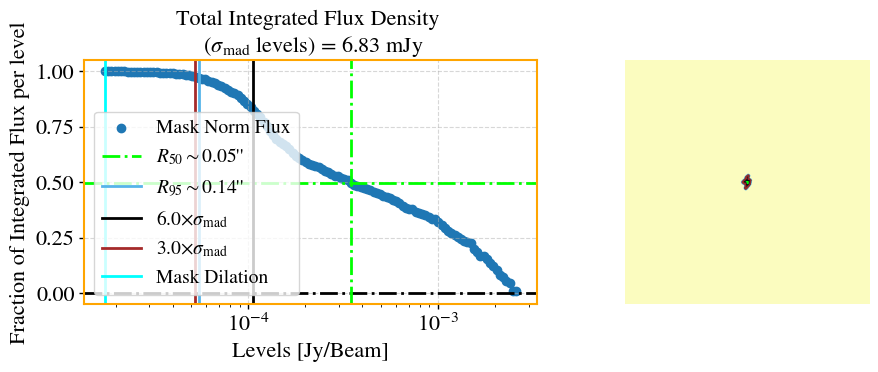

In [22]:
image_measures = mlibs.compute_image_properties(input_data.filename,
                                                input_data.residualname,
                                                # rms=input_data.rms_res,
                                                last_level=1)

128 512 384
non real ellipse
non real ellipse


/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:262: RuntimeWarning: invalid value encountered in divide
  qmedian = np.nanmedian(BB / AA)
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:264: RuntimeWarning: invalid value encountered in divide
  qmi = np.nanmedian((BB / AA)[:rsplit])
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:265: RuntimeWarning: invalid value encountered in divide
  qmo = np.nanmedian((BB / AA)[rsplit:])


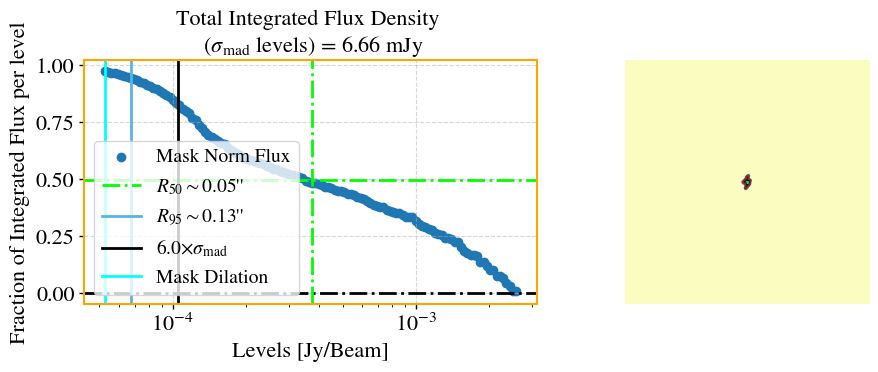

In [23]:
image_measures = mlibs.compute_image_properties(input_data.filename,
                                                input_data.residualname,
                                                last_level=3)

### 3.1.4 - Adding and calling all functions.  
In `morphen` the class `radio_image_analysis` contain all the function calls for common statistical calculations. 

All possible modifications can be made and calculations of interest can be implemented. 

In [24]:
# mp.radio_image_analysis??

<a id='emerlin_example'></a>
### 3.2 Analysing an $e$-MERLIN Image
So, let's work with an example.

2023-10-10 05:16:43 - INFO - Computing image level statistics.


     >> CALC: Performing mask dilation.
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


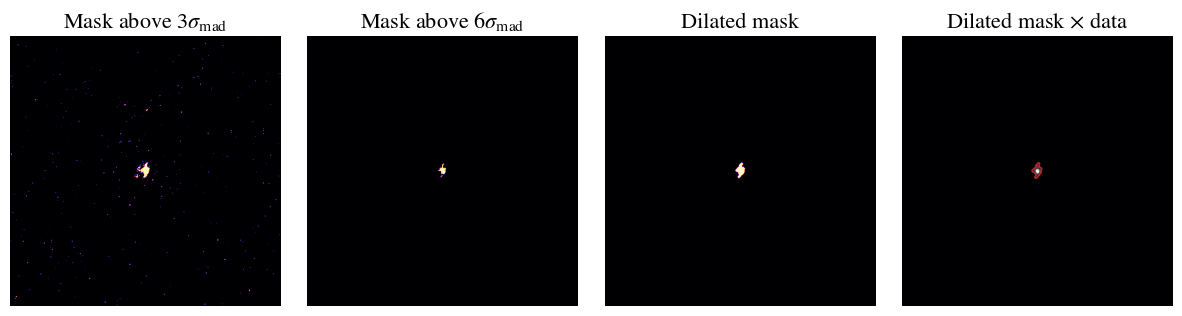

128 512 384
non real ellipse
non real ellipse


/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:262: RuntimeWarning: invalid value encountered in divide
  qmedian = np.nanmedian(BB / AA)
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:264: RuntimeWarning: invalid value encountered in divide
  qmi = np.nanmedian((BB / AA)[:rsplit])
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:265: RuntimeWarning: invalid value encountered in divide
  qmo = np.nanmedian((BB / AA)[rsplit:])
2023-10-10 05:16:45 - INFO - +---------------------------+
2023-10-10 05:16:45 - INFO - | Basic Source Properties |
2023-10-10 05:16:45 - INFO - +---------------------------+
2023-10-10 05:16:45 - DEBUG -  ==>  Peak of Flux=2.58 [mJy/beam]
2023-10-10 05:16:45 - DEBUG -  ==>  Total Flux Inside Mask='6.84 [mJy]
2023-10-10 05:16:45 - DEBUG -  ==>  Total Flux Image=8.26 [mJy]
2023-10-10 05:16:45 - DEBUG -  ==>  Half-Light Radii=5.97 [px]
2023-10-10 05:16:45 - DEBUG -  ==>  To

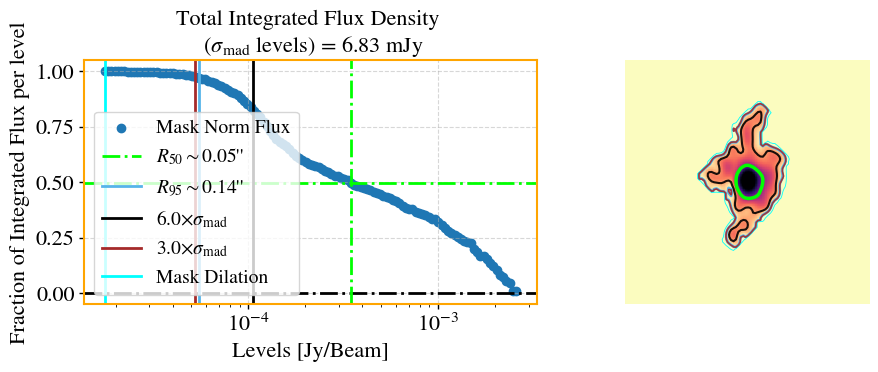

1


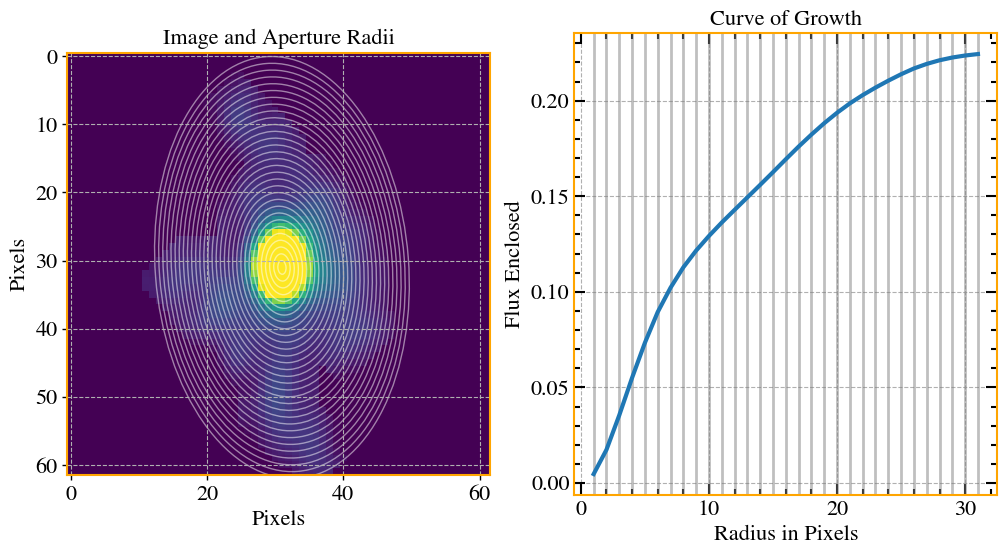

Rlast     >>  31
Rp        >>  26.99399879975995
Rtotal    >>  nan
1


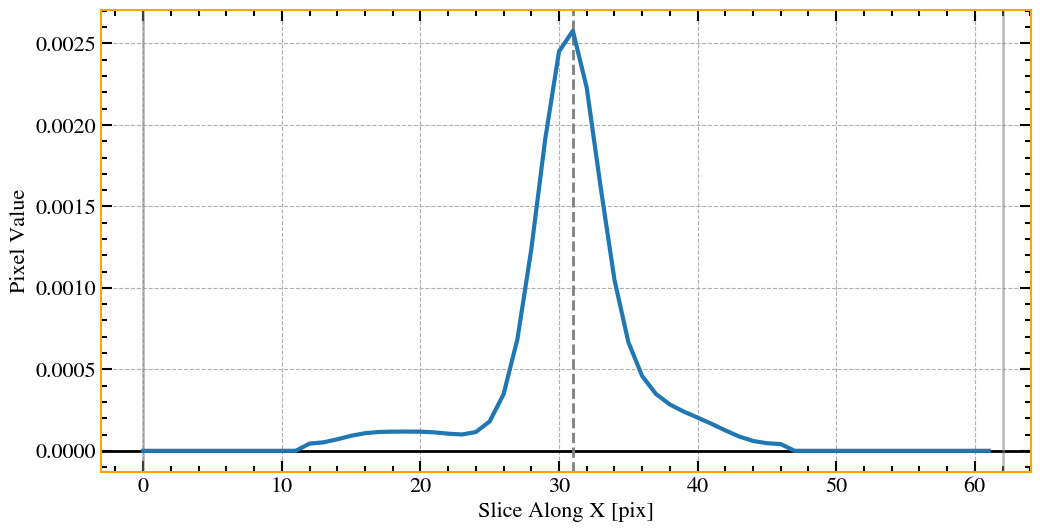

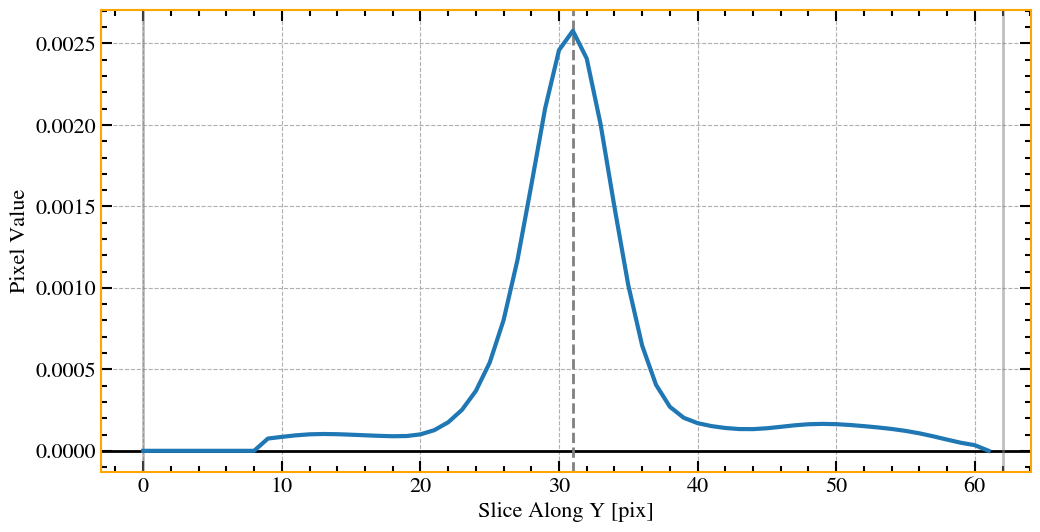

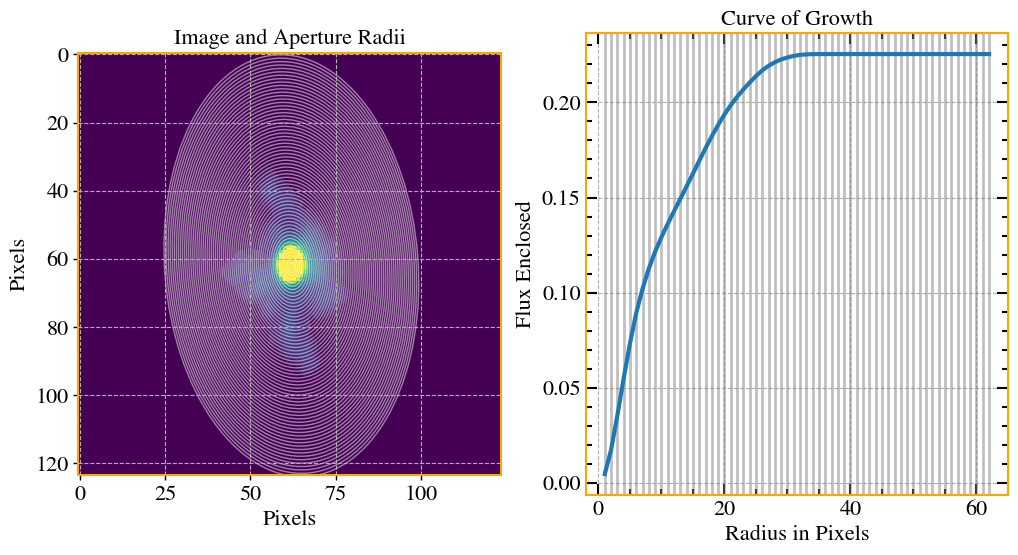

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2010: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


eta = 0.2
epsilon = 2
r_half_light (old vs new) = 8.10
r_total_flux (old vs new) = 35.00
R50 =  8.101820364072815
Rp= 25.115023004600918


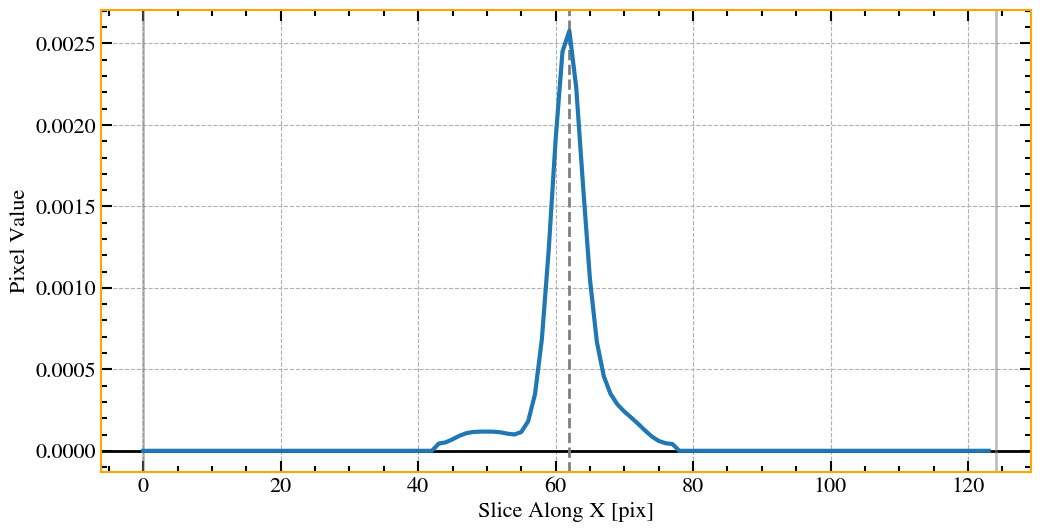

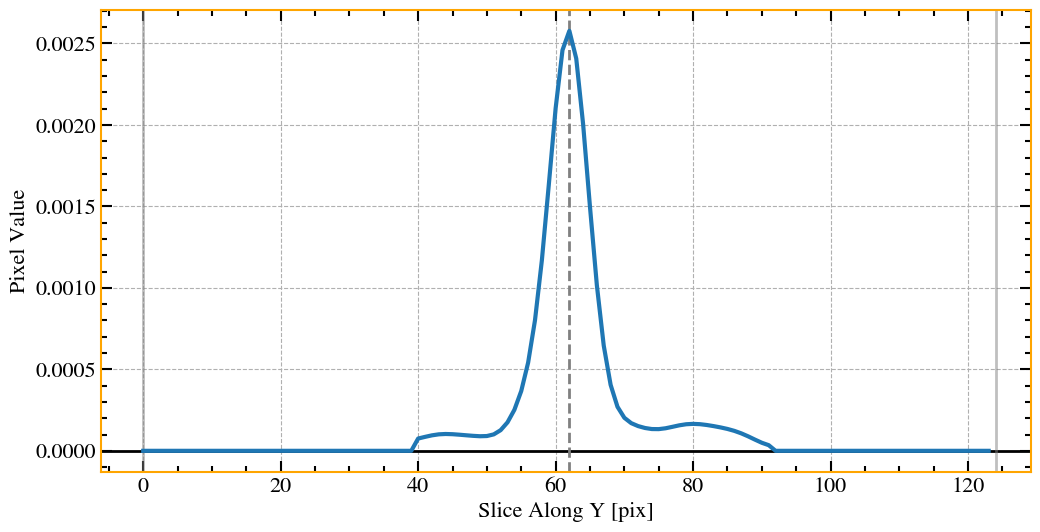

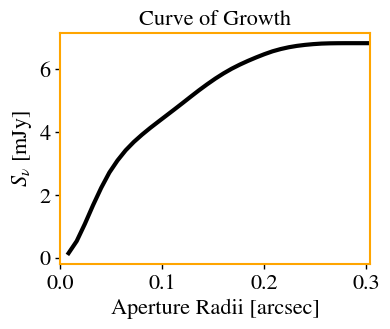

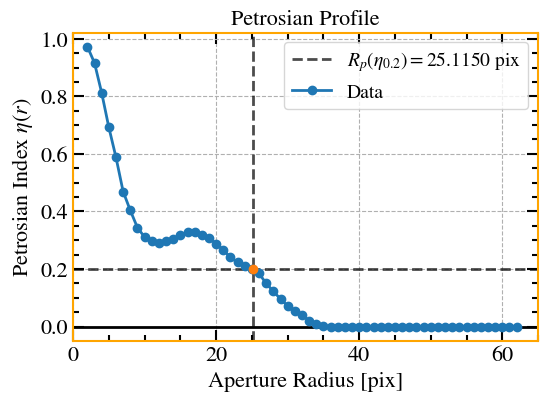

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2010: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing asymetries...
--==>> Computing image statistics...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 30.34it/s]

-----------------------------------------------------------------
Estimate of flux error (based on rms of residual x area): 
Flux =  6.8373370850595645 +/- 1.078929230321383 mJy
Fractional error flux =  0.1577996253364454
-----------------------------------------------------------------


In [56]:
analysis = mp.radio_image_analysis(input_data,z=mlibs.z_d['VV705'],crop=True,box_size=50,last_level=1, do_petro=True,sigma_mask=6)

#### 3.2.1 Output quantities
Note that multiple quantities are calculated (many of them are for 
testing purposes). They are stored in `image_measures`. For now, the ones that are relevant are: 
- `total_flux_mask` > Total integrated flux inside the dilated mask
- `uncertain_flux_mask` > Total integrated flux density inside the dilated mask (from `6*rms` to ~ `3*rms`). We can consider this as an uncertainty of the flux density.
- `C50radii` > Half-flux equivalent circular radius of the source.
- `C95radii` > approximated full-size circular radius of the source.
    (at the 95% flux)
- `Rp` > Petrosian radius
- `R50p` > Half-flux radius of the source from Petrosian photometry
- `R90p` > approximated full-size radius of the source (at the 95% flux) from the Petrosian photometry
- `rms_residual` > background rms of the residual image
- `peak_of_flux` > peak brightness of the radio map
- `(x0,y0)` > peak brightness position
- `(x0c,y0c)` > centroid position
- `(x0m,y0m)` > brightness momentum centre position
- `A50` > area enclosing the half-to-total flux (as multiple of the restoring 
    beam area)
- `A95` > total estimated emission area (as multiple of the restoring beam area)
- `qmi` > median averaged axis ratio of the region enclosing the half-light flux
- `qmo` > median averaged axis ratio of the outer region (from A50)
- `PAmi` > median averaged position angle (in degrees) of the region enclosing 
    the half-light flux
- `PAmo` > median averaged position angle (in degrees) of the outer region 
    (from A50)


All measured quantities are saved in a file in the form `*_stats.csv`, containing the dictionary `analysis.image_measures`.

In [35]:
# proper estimate for the total integrated flux  (good estimate, even if image contains deconvolution errors). 
# However, sometimes may be underestimated. 
f"{analysis.image_measures['total_flux_mask'] * 1e3:.2f} +/- "\
    f"{analysis.image_measures['uncertain_flux']*1e3:.2f}mJy"


'6.84 +/- 0.76mJy'

In [36]:
# upper total integrated flux  (may be overstimated if image contains deconvolution errors)
f"{analysis.image_measures['total_flux_nomask'] * 1e3:.2f}mJy"

'8.26mJy'

In [37]:
#total integrated flux (only uses positive pixel values, ignores negative intensities)
f"{analysis.image_measures['total_flux_levels'] * 1000:.2f}mJy"

'6.83mJy'

In [38]:
f"{analysis.image_measures['rms_residual'] * 1e6:.2f} mu Jy/beam"

'17.44 mu Jy/beam'

In [39]:
f"{analysis.image_measures['rms_im'] * 1e6:.2f} mu Jy/beam"

'21.65 mu Jy/beam'

In [40]:
print(f"{analysis.image_measures['qmi']:.2f}")
print(f"{analysis.image_measures['qmo']:.2f}")

0.81
0.60


In [41]:
print(f"{analysis.image_measures['PAmi']:.2f}")
print(f"{analysis.image_measures['PAmo']:.2f}")

10.87
17.88


In [42]:
print(f"{analysis.image_measures['PAm']:.2f}")
print(f"{analysis.image_measures['qm']:.2f}")

13.85
0.63


#### Using PetroFit

In [43]:
#total integrated flux  using the Petrosian method.
f"{analysis.image_measures['total_flux_rp'] * 1e3:.2f}mJy"

'6.84mJy'

In [44]:
analysis.image_measures['Rp'], analysis.image_measures['r_total_flux'],analysis.image_measures['C95radii'], analysis.image_measures['Cradii']

(25.115023004600918, 34.99599919983997, 17.607777518557306, 19.364117483750853)

#### Physical Scale Sizes
Lets convert the pixel size to a linear size scale, in $\rm pc$. 

We can use the function `pixsize_to_pc`:

In [45]:
pixsize_to_pc??


Object `pixsize_to_pc` not found.


In [46]:
# pixsize_to_pc(z=0.023,cell_size=0.05)

In [47]:
print(f"Redshift of VV705 = {mlibs.z_d['VV705']}")
pix_to_pc = mlibs.pixsize_to_pc(z=mlibs.z_d['VV705'],
                          cell_size=mlibs.get_cell_size(input_data.filename))

Redshift of VV705 = 0.04019


In [48]:
# Now, we can get the half-light circular radii of the source in pc:
f"{analysis.image_measures['C50radii']*pix_to_pc:.0f} pc"

'39 pc'

In [49]:
# and the full size circular radii:
f"{analysis.image_measures['C95radii']*pix_to_pc:.0f} pc"

'116 pc'

In [50]:
# Maximum size
f"{analysis.image_measures['Cradii']*pix_to_pc:.0f} pc"

'127 pc'

In [43]:
print(analysis.image_measures['C50radii'])#half-light radii source size in pixels
print(analysis.image_measures['C95radii'])#total source size in pixels

5.970821321441846
17.607777518557306


<a id='jvla_example'></a>
### 3.3 Analysing a JVLA Image


In [58]:
idx = -1
input_data=mp.read_data(filename=imagelist_vla[idx],
                        residualname=residuallist_vla[idx])

Image File: clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits
Residual File: clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-residual.cutout_north.fits


Numpy arrays containing the data can be acessed as:

In [59]:
image_data = input_data.image_data_2D
residual_data = input_data.residual_data_2D

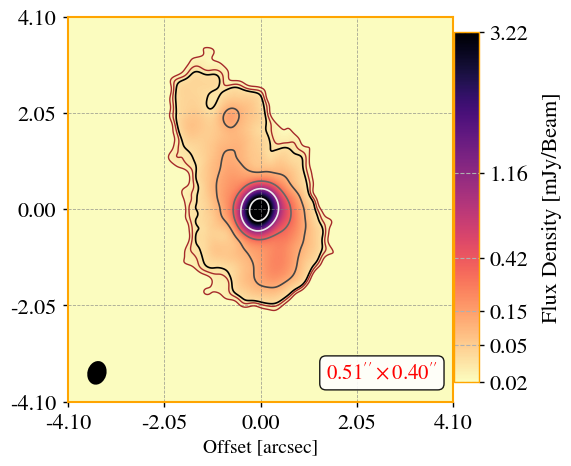

In [64]:
ax=mlibs.eimshow(input_data.filename,add_beam=True,
        vmin_factor=3.0,vmax_factor=0.5, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which negative std level?
        CM='magma_r',
       )

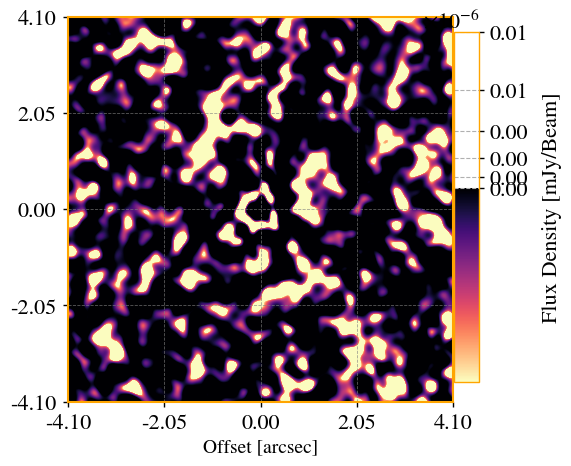

In [74]:
ax=mlibs.eimshow(input_data.residualname,
        vmin_factor=-1.0,vmax_factor=0.1, #level factor (max from peak, and min from std)
        CM='magma_r',add_contours=False # remove contours
       )

2023-10-10 06:11:49 - INFO - Computing image level statistics.


     >> CALC: Performing mask dilation.
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


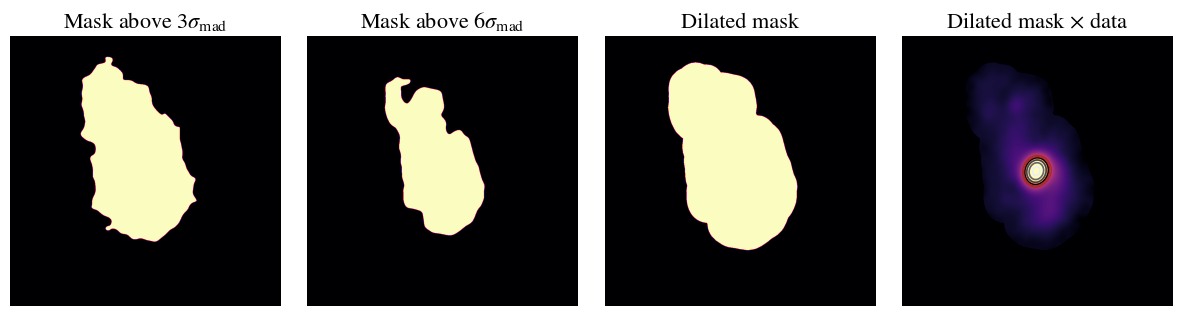

128 512 384


2023-10-10 06:11:52 - INFO - +---------------------------+
2023-10-10 06:11:52 - INFO - | Basic Source Properties |
2023-10-10 06:11:52 - INFO - +---------------------------+
2023-10-10 06:11:52 - DEBUG -  ==>  Peak of Flux=6.43 [mJy/beam]
2023-10-10 06:11:52 - DEBUG -  ==>  Total Flux Inside Mask='12.72 [mJy]
2023-10-10 06:11:52 - DEBUG -  ==>  Total Flux Image=13.28 [mJy]
2023-10-10 06:11:52 - DEBUG -  ==>  Half-Light Radii=45.33 [px]
2023-10-10 06:11:52 - DEBUG -  ==>  Total Source Size=222.13 [px]
2023-10-10 06:11:52 - DEBUG -  ==>  Source Global Axis Ratio=0.62
2023-10-10 06:11:52 - DEBUG -  ==>  Source Global PA=93.31 [degrees]
2023-10-10 06:11:52 - DEBUG -  ==>  Inner Axis Ratio=0.88
2023-10-10 06:11:52 - DEBUG -  ==>  Outer Axis Ratio=0.60
2023-10-10 06:11:52 - DEBUG -  ==>  Inner PA=167.44 [degrees]
2023-10-10 06:11:52 - DEBUG -  ==>  Outer PA=92.85 [degrees]


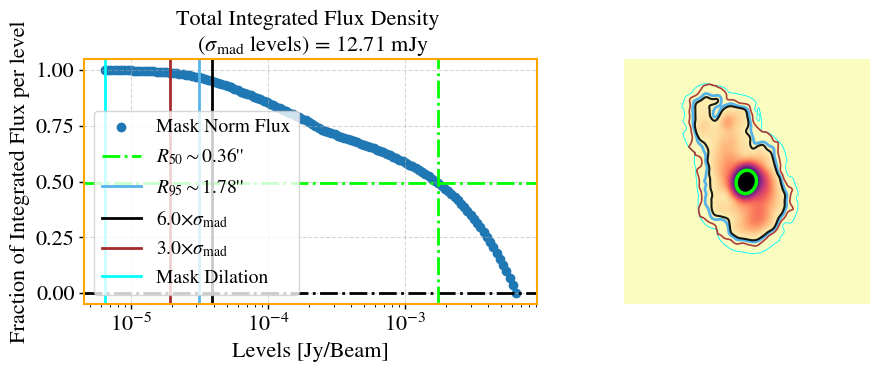

1


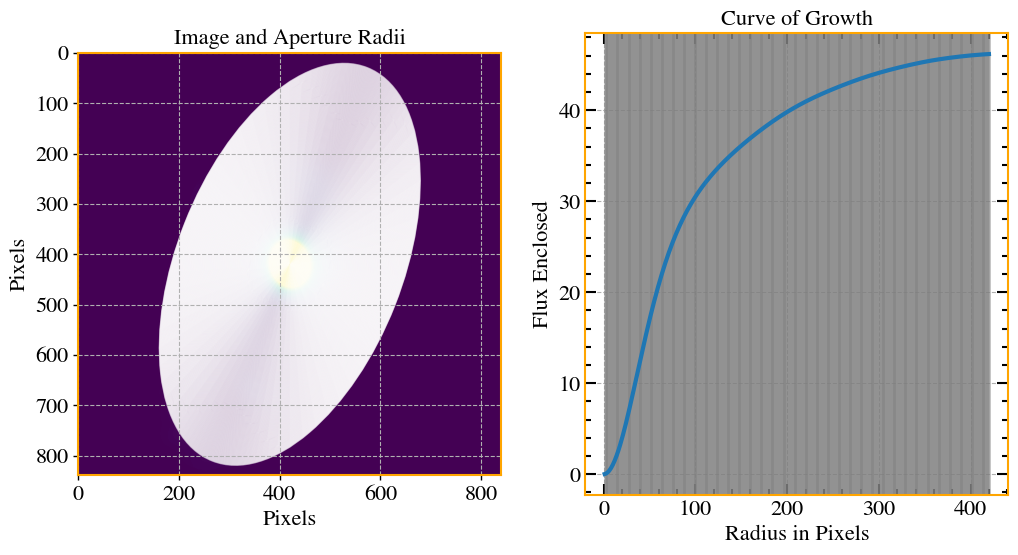

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2010: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


eta = 0.15
epsilon = 2
r_half_light (old vs new) = 67.47
r_total_flux (old vs new) = 414.89
R50 =  67.46669333866774
Rp= 207.4374874974995


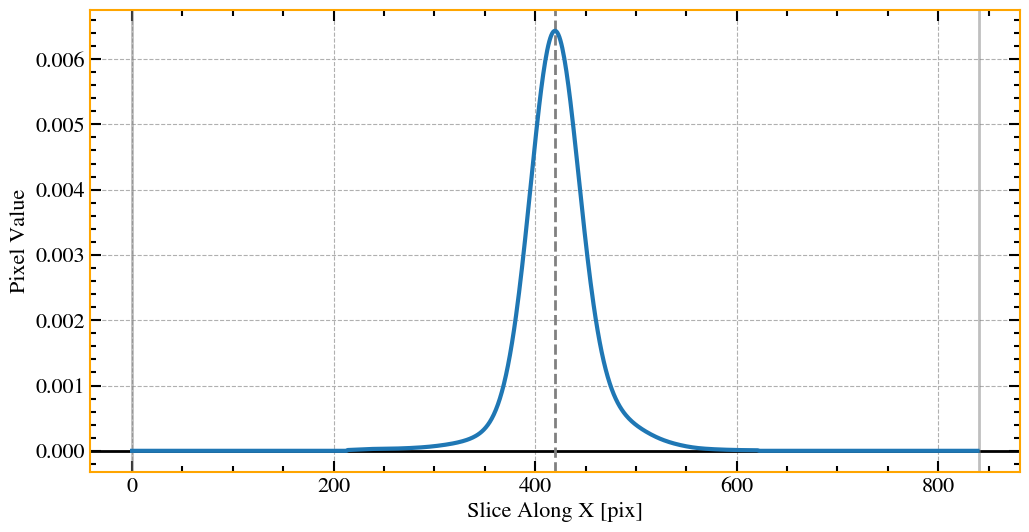

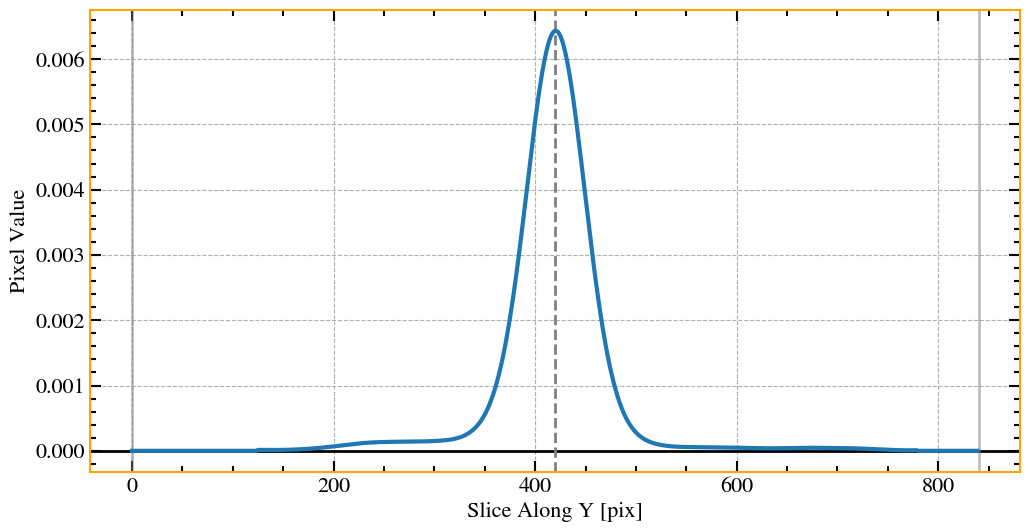

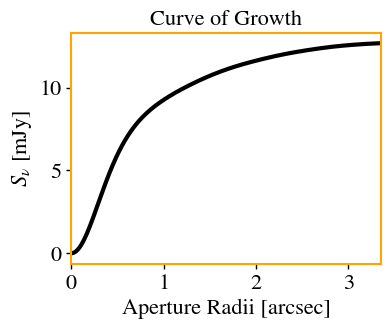

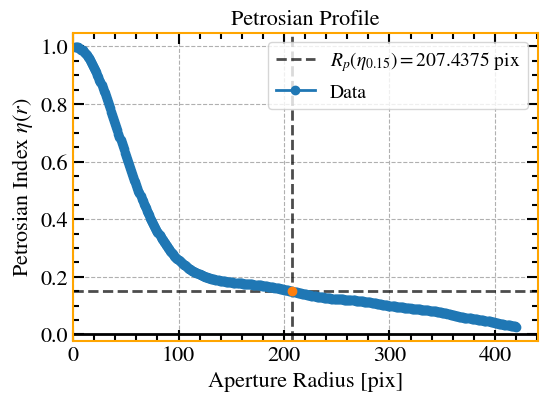

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2010: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing asymetries...
--==>> Computing image statistics...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.27it/s]


-----------------------------------------------------------------
Estimate of flux error (based on rms of residual x area): 
Flux =  12.71848133281573 +/- 0.23548033103693577 mJy
Fractional error flux =  0.01851481516345498
-----------------------------------------------------------------


In [75]:
analysis = mp.radio_image_analysis(input_data,z=mlibs.z_d['VV705'],crop=False,box_size=50,last_level=1, do_petro=True,sigma_mask=6)

In [79]:
analysis.image_measures

{'total_flux': 0.012708509426732444,
 'inner_flux': 0.008131661849116612,
 'low_flux': 0.0008122090310418493,
 'mid_flux': 0.003303733061887514,
 'uncertain_flux': 0.0004609054846864698,
 'inner_flux_f': 0.639859607139418,
 'low_flux_f': 0.06391064473173869,
 'mid_flux_f': 0.2599622781046286,
 'uncertain_flux_f': 0.03626747002421477,
 'number_of_beams': 53.44740273510588,
 'n_beams_inner': 3.519513270404412,
 'n_beams_mid': 20.23589574543182,
 'n_beams_low': 17.201500860210054,
 'n_beams_uncertain': 22.537803097219165,
 'total_flux_nomask': 0.01327656264911846,
 'total_flux_mask': 0.01271848133281573,
 'peak_of_flux': 0.00643191859126091,
 'total_flux_levels': 0.01271252627522831,
 'x0': 507.50026654024424,
 'y0': 509.50119868525616,
 'x0m': 503.804135018714,
 'y0m': 516.5161862125416,
 'PA': -68.4835462116111,
 'q': 0.5334682077075763,
 'PAm': 93.31029943917818,
 'qm': 0.6186804097414408,
 'PAmi': 167.43937531308876,
 'qmi': 0.879462299885096,
 'PAmo': 92.85102911415444,
 'qmo': 0.603

<a id='poor_snr_example'></a>
### 3.4 Image with poor SNR -- Source VV 705 S

Lets use these image analysis tools for some images that have low signal-to-noise and/or contains deconvolution issues. 


In [7]:

root_path_eM = 'data_examples/emerlin_only/VV705_C/' #only e-MERLIN images.
prefix_images = 'MFS_images/south/*MFS-image.cutout_south.fits' #The north component of VV705

In [8]:
# imagelist_vla = mlibs.glob.glob(root_path_vla+prefix_images)
# imagelist_comb = mlibs.glob.glob(root_path_comb+prefix_images)
imagelist_eM = mlibs.glob.glob(root_path_eM+prefix_images)

In [9]:
imagelist_eM,residuallist_eM = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_eM,return_df = False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 87.14it/s]

0 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_south.fits
1 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_south.fits
2 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_south.fits
3 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_south.fits
4 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_south.fits


In [17]:
idx = 0
input_data=mp.read_data(filename=imagelist_eM[idx],
                        residualname=residuallist_eM[idx])

Image File: clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_south.fits
Residual File: clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-residual.cutout_south.fits


Numpy arrays containing the data can be acessed as:

In [18]:
image_data = input_data.image_data_2D
residual_data = input_data.residual_data_2D

  >> Center -->  [512 510   0   0]


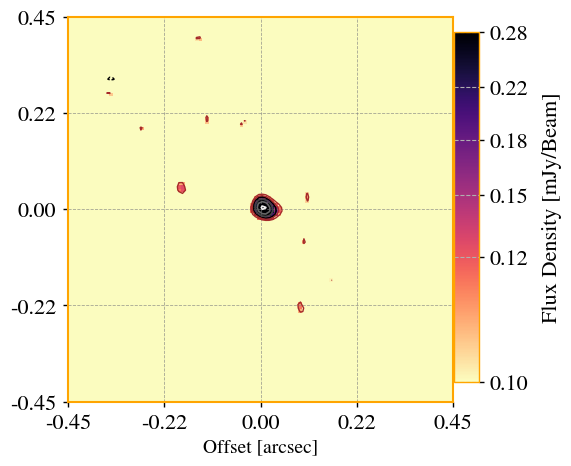

In [22]:
rms = input_data.rms_res
ax=mlibs.eimshow(input_data.filename,rms=rms,
        vmax_factor=0.5, vmin_factor=3.0, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=56
       )

/home/sagauga/miniconda3/envs/morphen38/lib/python3.8/site-packages/numpy/core/function_base.py:431: RuntimeWarning: invalid value encountered in log10
  log_start = _nx.log10(start)


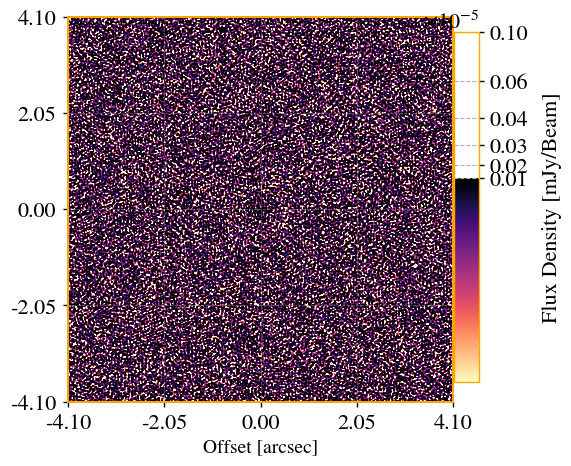

In [23]:
ax=mlibs.eimshow(input_data.residualname,
        vmin_factor=-1.0,vmax_factor=0.1, #level factor (max from peak, and min from std)
        CM='magma_r',add_contours=False # remove contours
       )

2023-10-10 06:32:16 - INFO - Computing image level statistics.


     >> CALC: Performing mask dilation.
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


/home/sagauga/miniconda3/envs/morphen38/lib/python3.8/site-packages/astropy/visualization/mpl_normalize.py:180: RuntimeWarning: divide by zero encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/home/sagauga/miniconda3/envs/morphen38/lib/python3.8/site-packages/astropy/visualization/mpl_normalize.py:180: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


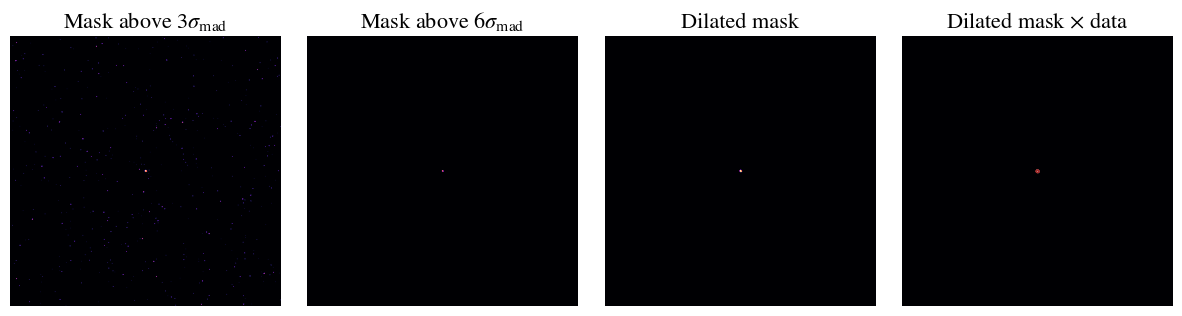

128 512 384
non real ellipse
non real ellipse
non real ellipse
non real ellipse
non real ellipse
non real ellipse


/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:262: RuntimeWarning: invalid value encountered in divide
  qmedian = np.nanmedian(BB / AA)
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:264: RuntimeWarning: invalid value encountered in divide
  qmi = np.nanmedian((BB / AA)[:rsplit])
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse.py:265: RuntimeWarning: invalid value encountered in divide
  qmo = np.nanmedian((BB / AA)[rsplit:])
2023-10-10 06:32:23 - INFO - +---------------------------+
2023-10-10 06:32:23 - INFO - | Basic Source Properties |
2023-10-10 06:32:23 - INFO - +---------------------------+
2023-10-10 06:32:23 - DEBUG -  ==>  Peak of Flux=0.55 [mJy/beam]
2023-10-10 06:32:23 - DEBUG -  ==>  Total Flux Inside Mask='0.78 [mJy]
2023-10-10 06:32:23 - DEBUG -  ==>  Total Flux Image=1.32 [mJy]
2023-10-10 06:32:23 - DEBUG -  ==>  Half-Light Radii=2.26 [px]
2023-10-10 06:32:23 - DEBUG -  ==>  To

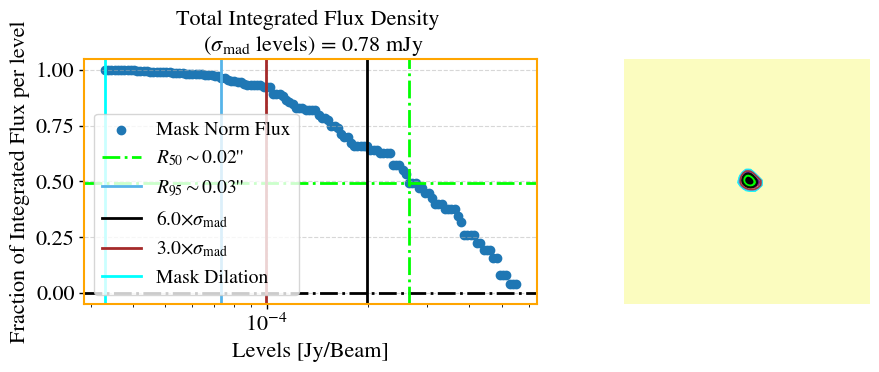

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2010: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing asymetries...
--==>> Computing image statistics...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.36it/s]


-----------------------------------------------------------------
Estimate of flux error (based on rms of residual x area): 
Flux =  0.7818455057294847 +/- 0.32438749564280817 mJy
Fractional error flux =  0.41489973820357917
-----------------------------------------------------------------


In [24]:
analysis = mp.radio_image_analysis(input_data,z=mlibs.z_d['VV705'],crop=True,box_size=50,last_level=1, do_petro=True,sigma_mask=6)

<a id='poor_snr_example'></a>
### 3.4 Image with poor SNR -- Source VV 250 NW


In [38]:

root_path_eM = 'data_examples/emerlin_only/VV250_C/' #only e-MERLIN images.
prefix_images = 'MFS_images/north/*MFS-image.cutout_north.fits' #The north component of VV705

In [39]:
# imagelist_vla = mlibs.glob.glob(root_path_vla+prefix_images)
# imagelist_comb = mlibs.glob.glob(root_path_comb+prefix_images)
imagelist_eM = mlibs.glob.glob(root_path_eM+prefix_images)

In [40]:
imagelist_eM,residuallist_eM = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_eM,return_df = False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.71it/s]

0 >> clean_image_VV250_eM.avg12s.selfcalibrated_p-ap-p-ap_13840x11048_0.008arcsec_25000.briggs.multiscale.taper_0.025asec.2.0-MFS-image.cutout_north.fits


In [42]:
idx = 0
input_data=mp.read_data(filename=imagelist_eM[idx],
                        residualname=residuallist_eM[idx])

Image File: clean_image_VV250_eM.avg12s.selfcalibrated_p-ap-p-ap_13840x11048_0.008arcsec_25000.briggs.multiscale.taper_0.025asec.2.0-MFS-image.cutout_north.fits
Residual File: clean_image_VV250_eM.avg12s.selfcalibrated_p-ap-p-ap_13840x11048_0.008arcsec_25000.briggs.multiscale.taper_0.025asec.2.0-MFS-residual.cutout_north.fits


Numpy arrays containing the data can be acessed as:

In [43]:
image_data = input_data.image_data_2D
residual_data = input_data.residual_data_2D

  >> Center -->  [766 768   0   0]


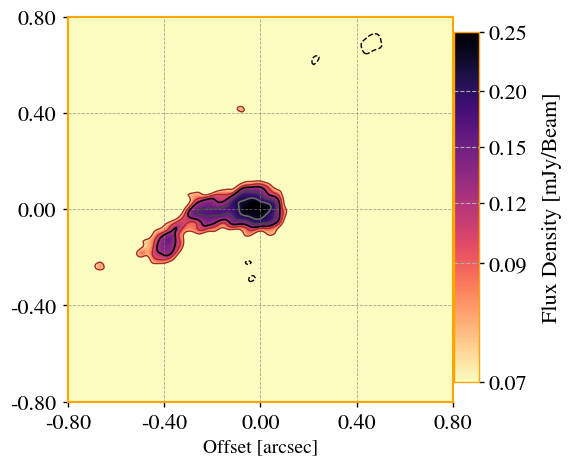

In [44]:
rms = input_data.rms_res
ax=mlibs.eimshow(input_data.filename,rms=rms,
        vmax_factor=0.99, vmin_factor=3.0, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=100
       )

/mirror/scratch/lucatelli/app/miniconda3/envs/casa6/lib/python3.8/site-packages/numpy/core/function_base.py:423: RuntimeWarning: invalid value encountered in log10
  log_start = _nx.log10(start)


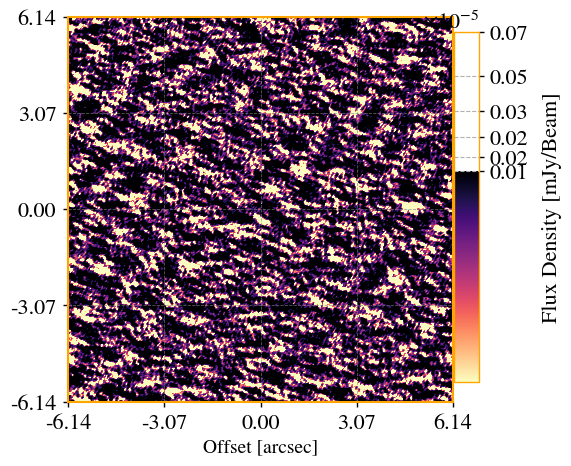

In [45]:
ax=mlibs.eimshow(input_data.residualname,
        vmin_factor=-1.0,vmax_factor=0.1, #level factor (max from peak, and min from std)
        CM='magma_r',add_contours=False # remove contours
       )

2023-10-10 09:52:42 - INFO - Computing image level statistics.


     >> CALC: Performing mask dilation.
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


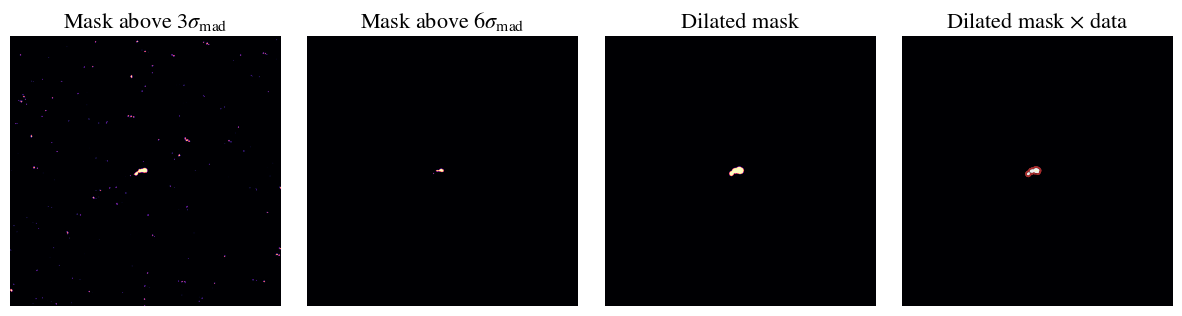

192 768 576


2023-10-10 09:52:49 - INFO - +---------------------------+
2023-10-10 09:52:49 - INFO - | Basic Source Properties |
2023-10-10 09:52:49 - INFO - +---------------------------+
2023-10-10 09:52:49 - DEBUG -  ==>  Peak of Flux=0.26 [mJy/beam]
2023-10-10 09:52:49 - DEBUG -  ==>  Total Flux Inside Mask='1.34 [mJy]
2023-10-10 09:52:49 - DEBUG -  ==>  Total Flux Image=0.93 [mJy]
2023-10-10 09:52:49 - DEBUG -  ==>  Half-Light Radii=15.11 [px]
2023-10-10 09:52:49 - DEBUG -  ==>  Total Source Size=26.83 [px]
2023-10-10 09:52:49 - DEBUG -  ==>  Source Global Axis Ratio=0.51
2023-10-10 09:52:49 - DEBUG -  ==>  Source Global PA=90.99 [degrees]
2023-10-10 09:52:49 - DEBUG -  ==>  Inner Axis Ratio=0.38
2023-10-10 09:52:49 - DEBUG -  ==>  Outer Axis Ratio=0.53
2023-10-10 09:52:49 - DEBUG -  ==>  Inner PA=9.07 [degrees]
2023-10-10 09:52:49 - DEBUG -  ==>  Outer PA=93.61 [degrees]


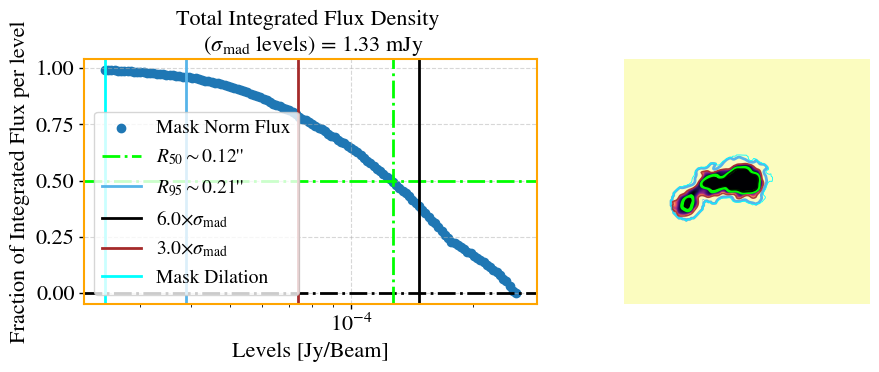

1


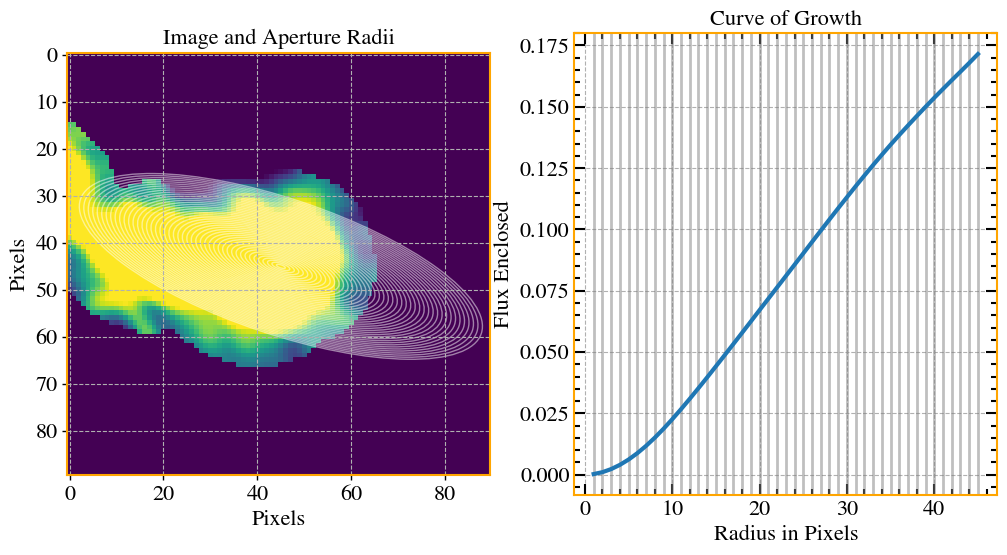

Rlast     >>  45
Rp        >>  nan
Rtotal    >>  nan
1


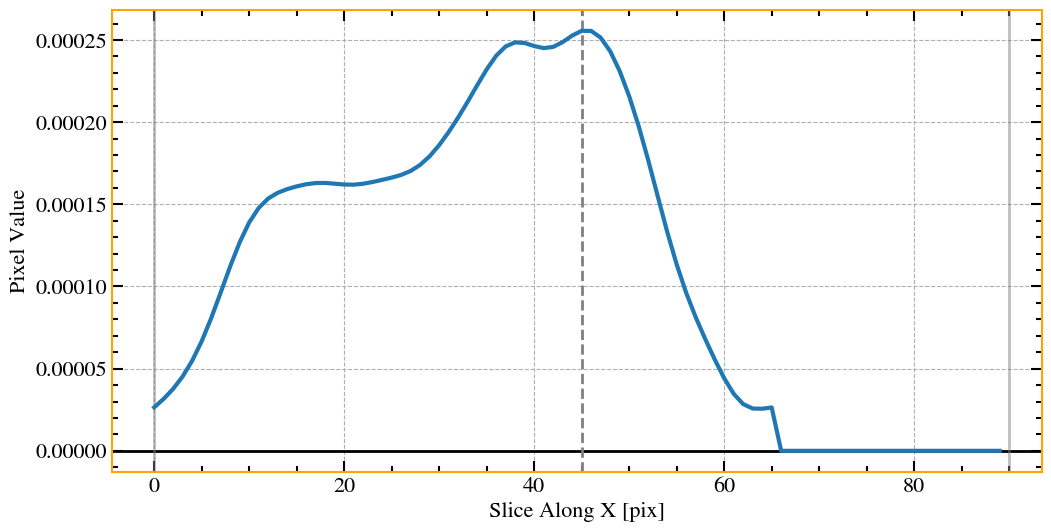

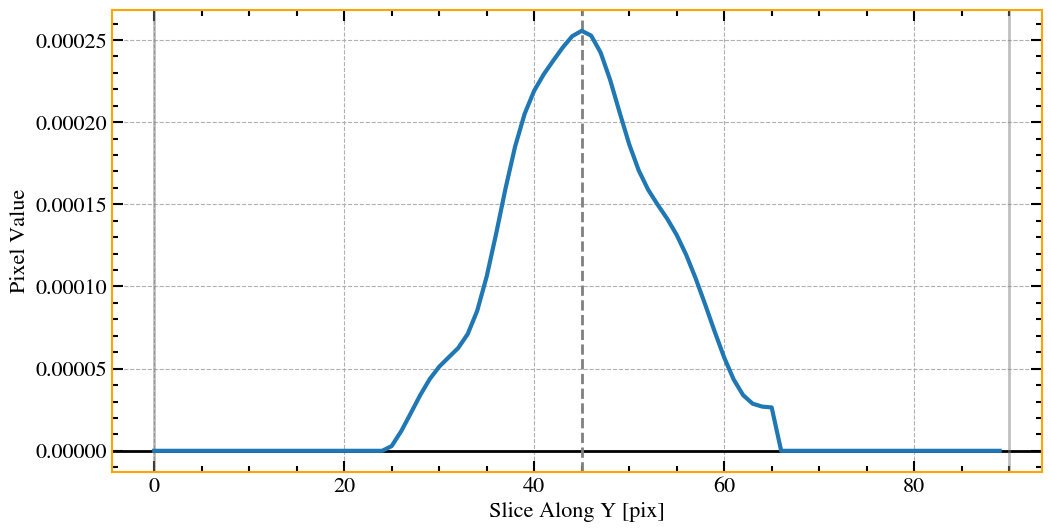

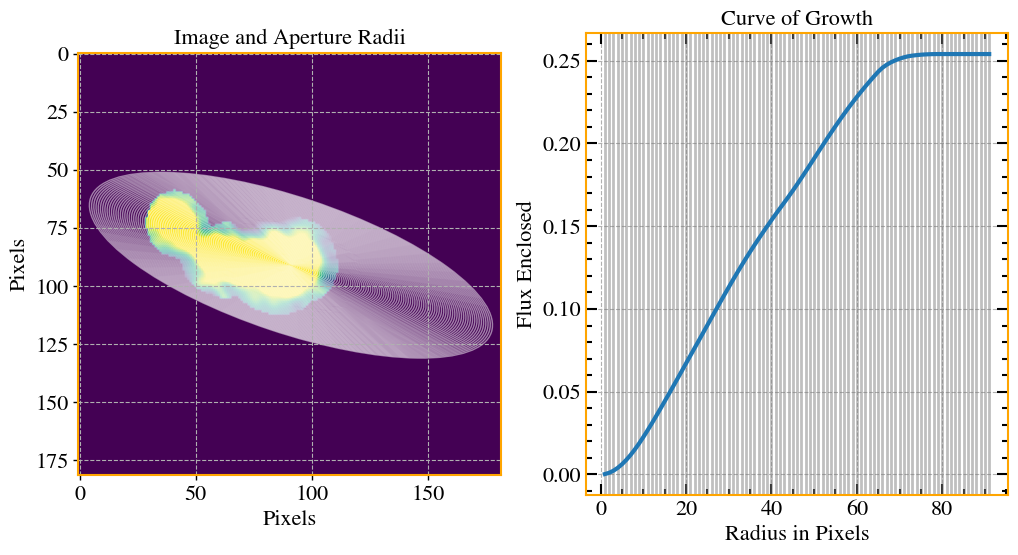

Rlast     >>  91
Rp        >>  68.06341268253651
Rtotal    >>  nan
1


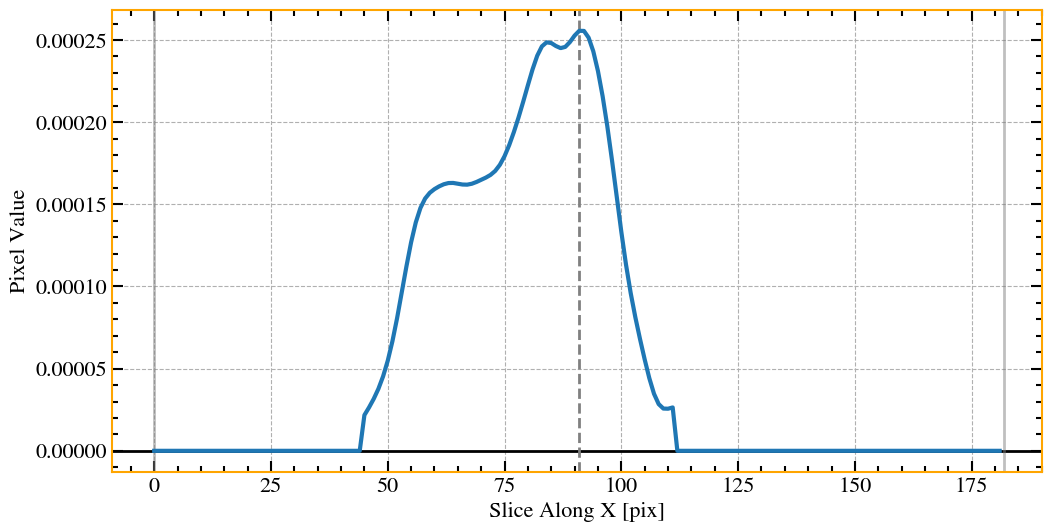

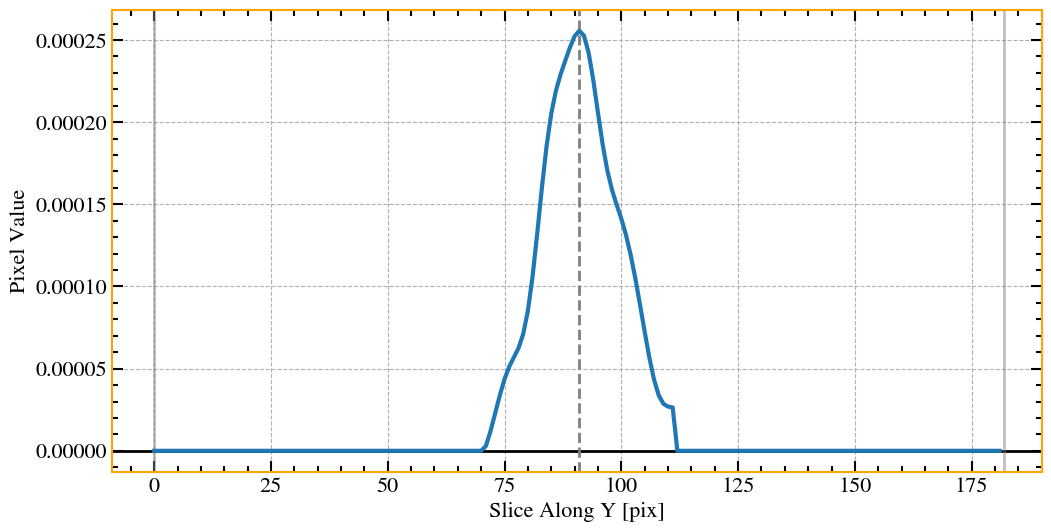

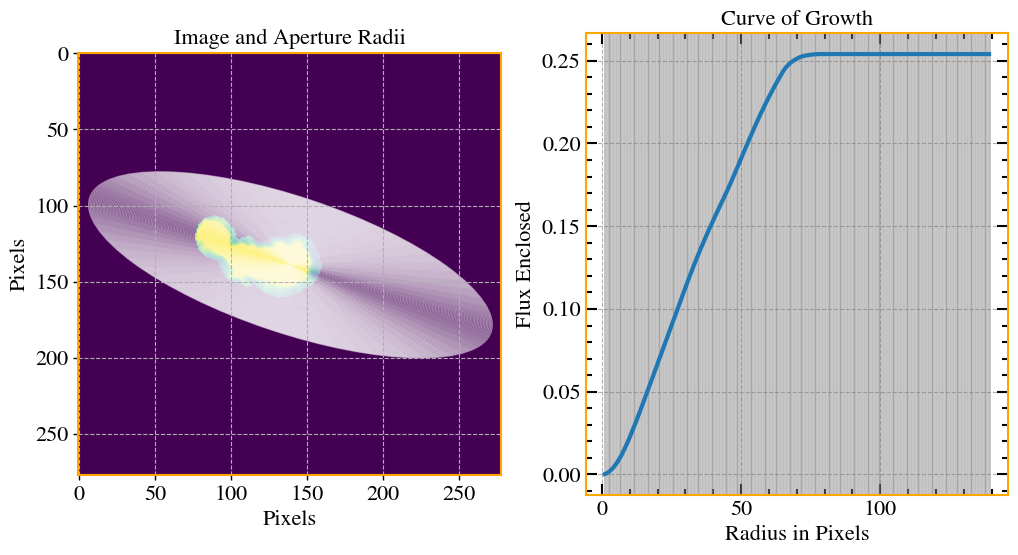

eta = 0.25
epsilon = 2
r_half_light (old vs new) = 33.49
r_total_flux (old vs new) = 79.39


/mirror/scratch/lucatelli/pcloud/PhD/GitHub/morphen/libs/libs.py:2010: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


R50 =  33.494625881790704
Rp= 66.96122060979509


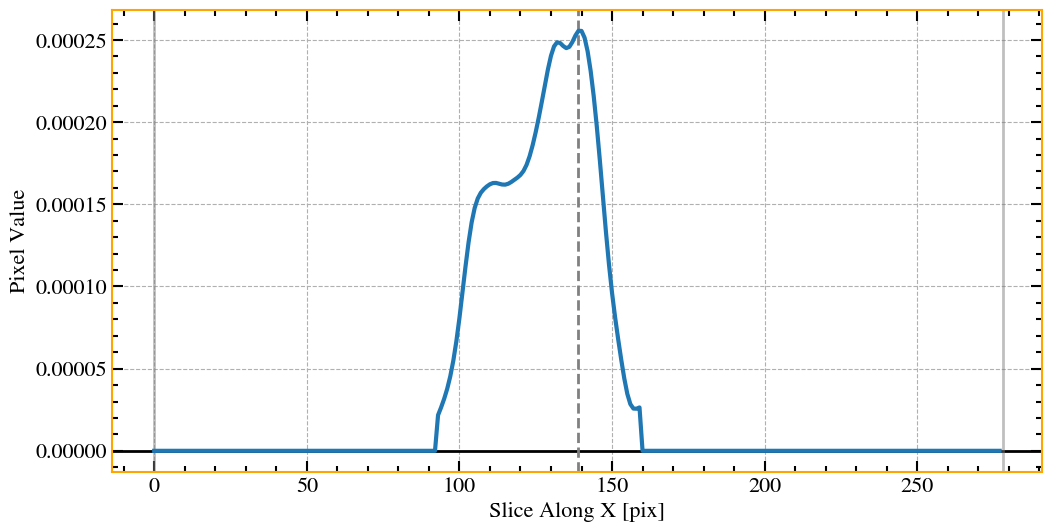

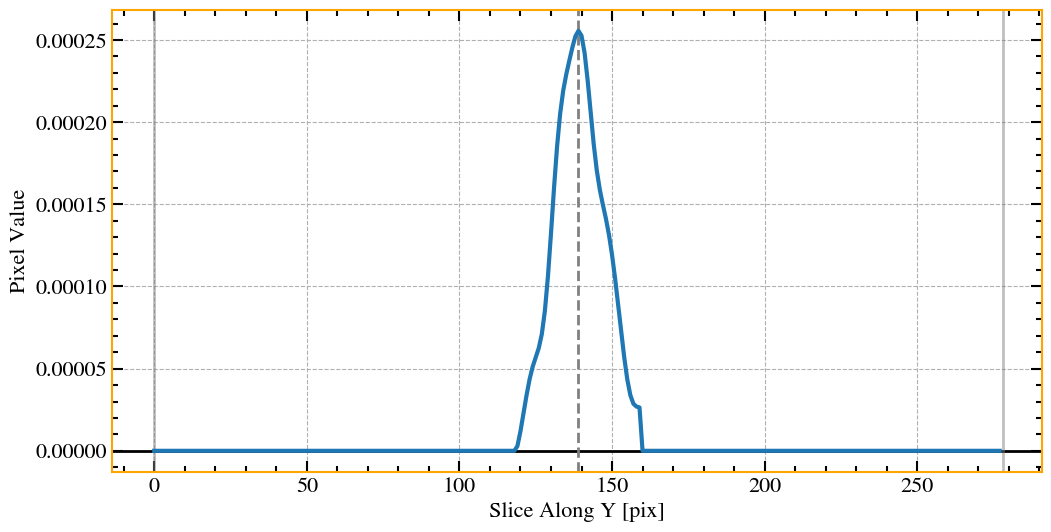

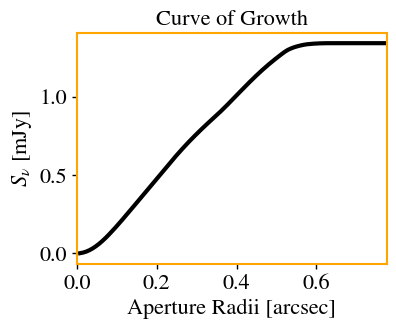

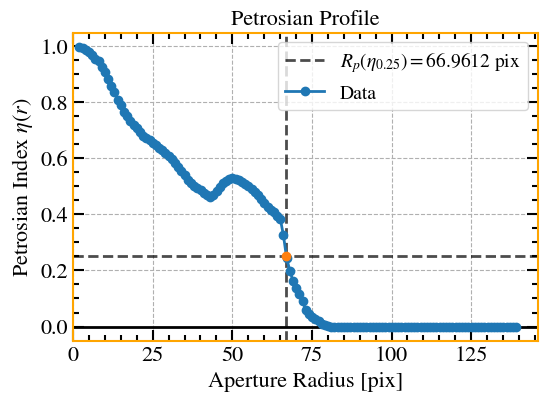

/mirror/scratch/lucatelli/pcloud/PhD/GitHub/morphen/libs/libs.py:2010: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing asymetries...
--==>> Computing image statistics...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.44it/s]


-----------------------------------------------------------------
Estimate of flux error (based on rms of residual x area): 
Flux =  1.339947734967935 +/- 0.22414914135778352 mJy
Fractional error flux =  0.16728200325152787
-----------------------------------------------------------------


In [46]:
analysis = mp.radio_image_analysis(input_data,z=mlibs.z_d['VV250'],crop=True,box_size=100,last_level=1, do_petro=True,sigma_mask=6)